# Codes for DST-data etc.

In [1]:
import requests
import numpy as np
import pandas as pd

def get_data(table_id,variables):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    
    for var in variables:
        base += '&{v}'.format(v = var) 

    response=requests.get(base)
    data_json=response.json()
    return data_json


## RAS201 data

In [ ]:
data5=get_data('RAS201',['Tid=*','OMRÅDE=085','SOCIO=50']) # Sjælland
data4=get_data('RAS201',['OMRÅDE=084','Tid=*','SOCIO=50']) # Hovedstaden
data3=get_data('RAS201',['Tid=*','OMRÅDE=083','SOCIO=50']) # Syddanmark
data2=get_data('RAS201',['Tid=*','OMRÅDE=082','SOCIO=50']) # Midtjylland
data1=get_data('RAS201',['Tid=*', 'OMRÅDE=081','SOCIO=50']) # Nordjylland

indexlabels=['2008','2009','2010','2011','2012','2013','2014','2015','2016']

df1=pd.DataFrame(data1['dataset']['value'],index=indexlabels,columns=['Region Nordjylland'])
df2=pd.DataFrame(data2['dataset']['value'],index=indexlabels,columns=['Region Midtjylland'])
df3=pd.DataFrame(data3['dataset']['value'],index=indexlabels,columns=['Region Syddanmark'])
df4=pd.DataFrame(data4['dataset']['value'],index=indexlabels,columns=['Region Hovedstaden'])
df5=pd.DataFrame(data5['dataset']['value'],index=indexlabels,columns=['Region Sjælland'])

dfs=[df1,df2,df3,df4,df5]
RAS201=pd.concat(dfs,axis=1)
RAS201=df_Unemployment_by_residence.reindex(index=RAS201.index[::-1]) # Reversing row index
RAS201

## NAN1 data

In [ ]:
indexlabels_bnp=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
data_bnp=get_data('NAN1',['Tid=2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017','TRANSAKT=B1GQK','PRISENHED=LAN_M']) # Nordjylland
BNP=pd.DataFrame(data_bnp['dataset']['value'],index=indexlabels_bnp,columns=['2010-priser, kædede værdier, (mia kr.)'])
#BNP=BNP.reindex(index=BNP.index[::-1])
#BNP=BNP.transpose()
BNP

## FOLK1A data (non-API)

In [4]:
path='https://github.com/Naeim-S/GRP33/blob/master/EXAM/Dataset/FOLK1APython.xlsx?raw=true'

FOLK1A=pd.read_excel(path)



## Dataframe to markdown

In [ ]:
def df_to_markdown(*dfs, sep_line='\n---\n', **kwargs):
    """Convert pandas dataframe to markdown table."""
    import tabulate

    disable_numparse = kwargs.pop('disable_numparse', True)
    tablefmt = kwargs.pop('tablefmt', 'pipe')
    headers = kwargs.pop('headers', 'keys')
    
    for df in dfs:
        print(tabulate.tabulate(df, tablefmt=tablefmt, headers=headers,
                                disable_numparse=disable_numparse, **kwargs))
        if sep_line is not None:
            print(sep_line)
            
            
df_to_markdown(FOLK1A,BNP,RAS201)

# Visualizations for descriptive analysis

# Visualizations for analysis

In [2]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt


import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : True})

%matplotlib inline

In [20]:
raw='https://raw.githubusercontent.com/Naeim-S/GRP33/master/EXAM/merged_ratio.xlsx'
merged=pd.read_excel(raw)
#del merged['Unnamed: 0'] #Appearently necessary when loading the csv-file on MacOS

sector_order=merged.sector.unique()
area_order=merged.area.unique()

merged.tail(10)

#list(merged)

,year,area,sector,jobtype,n_jobtype_area,n_sector_area,n_sector,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sector_area,AR_sector,AR_area,AR_year,RR_jobtype_area,RR_sector_area,RR_sector,RR_area,RR_year
4940,2017,Zealand,Social,Care,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,Zealand,Social,Psychiatry,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,Zealand,Social,Social counseling,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,Zealand,Social,Dentist,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,Zealand,Social,Technical health,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,Zealand,Social,Therapy,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,Zealand,Teaching,Library,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,Zealand,Teaching,Research,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,Zealand,Teaching,Teacher,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,Zealand,Teaching,Pedagogue,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


## Elasticity for sector and area

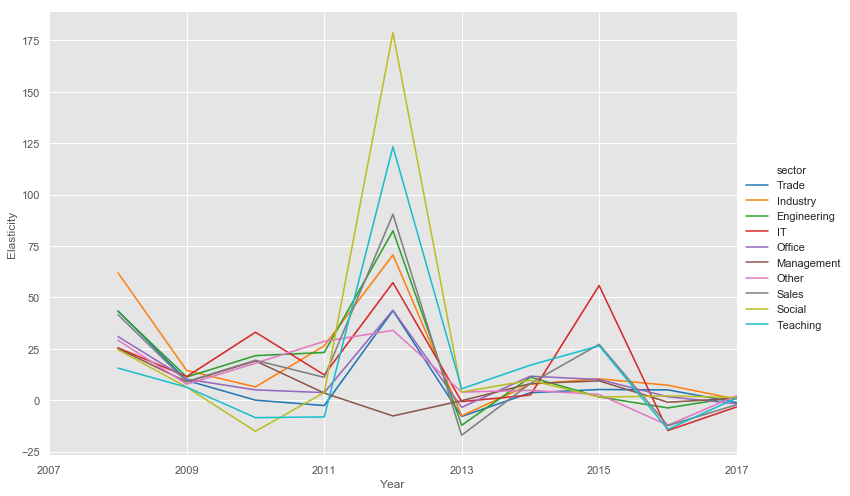

In [9]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_sektor = merged.query('sektor').sort_values(by=["ratio_sektor","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_sector", 
            hue="sector", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=sector_order,
            data=merged)
plt.ylabel("Elasticity")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('1_RR_Sector.png',bbox_inches='tight')
# All jobs for each area over time

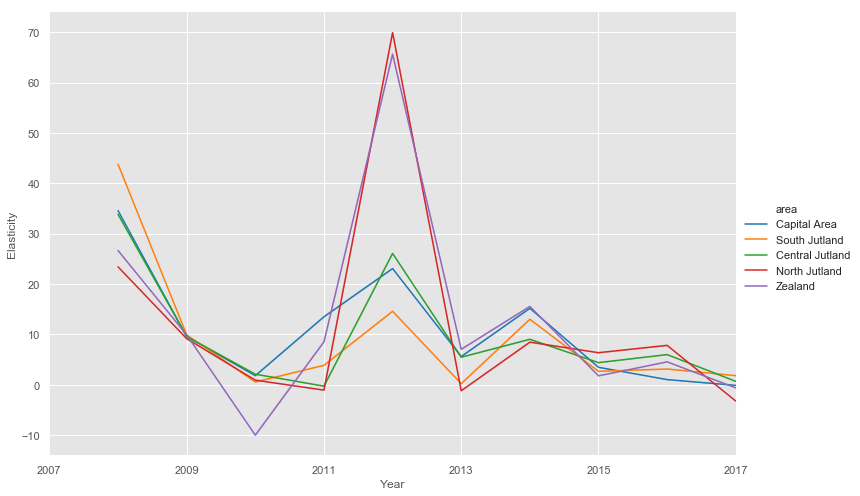

In [10]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_area = merged.query(' area != "danmark"').sort_values(by=["ratio_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=area_order,
            data=merged)
plt.ylabel("Elasticity")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('2_RR_Area.png',bbox_inches='tight')


# All jobs for each area over time

## Sectors across areas

In [ ]:
#All sectors for each area over time

sns.set_palette("tab10")

#KØBENHAVN
sns.relplot(x="year", y="RR_sector_area", 
        hue="sector", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        hue_order=sector_order,
        data=merged.query('area == "Capital Area"').sort_values(by=["year", "RR_sector_area"], ascending=False))
plt.title("Region Capital Area")
plt.ylabel("Elasticity")

plt.savefig('3.1_RR_sector_area.png',bbox_inches='tight')

#MIDTJYLLAND
sns.relplot(x="year", y="RR_sector_area", 
        hue="sector", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sector_order,
        data=merged.query('area == "Central Jutland" ').sort_values(by=["year", "RR_sector_area"], ascending=False))
plt.title("Region Central Jutland")
plt.ylabel("Elasticity")

plt.savefig('3.2_RR_sector_area.png',bbox_inches='tight')

#SYDJYLLAND
sns.relplot(x="year", y="RR_sector_area", 
        hue="sector", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sector_order,
        data=merged.query('area == "Southern Denmark" ').sort_values(by=["year", "RR_sector_area"], ascending=False))
plt.title("Region Southern Denmark")
plt.ylabel("Elasticity")

plt.savefig('3.3_RR_sector_area.png',bbox_inches='tight')

#REGION SJÆLLAND
sns.relplot(x="year", y="RR_sector_area", 
        hue="sector", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sector_order,
        data=merged.query('area == "Zealand" ').sort_values(by=["year", "RR_sector_area"], ascending=False))
plt.title("Region Zealand")
plt.ylabel("Elasticity")

plt.savefig('3.4_RR_sector_area.png',bbox_inches='tight')


#NORDJYLLAND
sns.relplot(x="year", y="RR_sector_area", 
        hue="sector", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sector_order,
        data=merged.query('area == "Northern Jutland" ').sort_values(by=["year", "RR_sector_area"], ascending=False))
plt.title("Region Northern Jutland")
plt.ylabel("Elasticity")

plt.savefig('3.5_RR_sector_area.png',bbox_inches='tight')


## Jobtypes for sectors

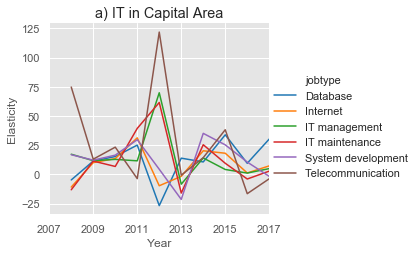

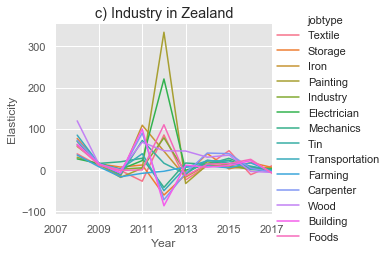

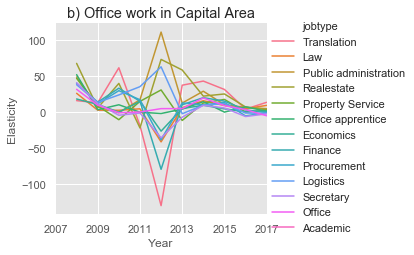

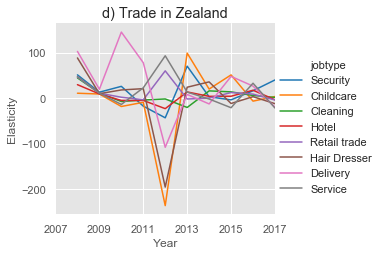

In [16]:
#KØBENHAVN IT - minus it-courses
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "Capital Area" & sector == "IT" & jobtype != "It courses"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("a) IT in Capital Area")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.1_RR_jobtype_area.png',bbox_inches='tight')


#Sjælland industri 
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "Zealand" & sector == "Industry"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("c) Industry in Zealand")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.2_RR_jobtype_area.png',bbox_inches='tight')

#KØBENHAVN kontor - minus office-courses
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "Capital Area" & sector == "Office" & jobtype != "Office courses"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("b) Office work in Capital Area")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.3_RR_jobtype_area.png',bbox_inches='tight')


#Sjælland handel
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "Zealand" & sector == "Trade"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("d) Trade in Zealand")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.4_RR_jobtype_area.png',bbox_inches='tight')
